## 1. Data Preprocessing and Cleaning

### Importing libraries to carry out the data cleaning & loading of the dataset

In [34]:
import pandas as pd
df = pd.read_csv('./data/insurance_dataset.csv')

### Checking for missing values, data types, and the number of columns and rows 

In [35]:
print("Dataset Overview:")
print("\nDataset Shape:", df.shape)
print("\nColumn Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Overview:

Dataset Shape: (1000000, 12)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         1000000 non-null  object 
 7   family_medical_history  1000000 non-null  object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory us

### Convert categorical columns to numerical using the `LabelEncoder` & `pd.getdummies()` function

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoker'] = le.fit_transform(df['smoker'])
df = pd.get_dummies(df, columns=['region', 'occupation', 'coverage_level','medical_history', 'family_medical_history', 'exercise_frequency'])

### Feature scaling (optional):
#### Normalize features like income and BMI for better model performance.

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'bmi']] = scaler.fit_transform(df[['age', 'bmi']])

## 2. Exploratory Data Analysis (`EDA`)

### Visualize data trends:
#### Plot the relationships between key variables and `charges`.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

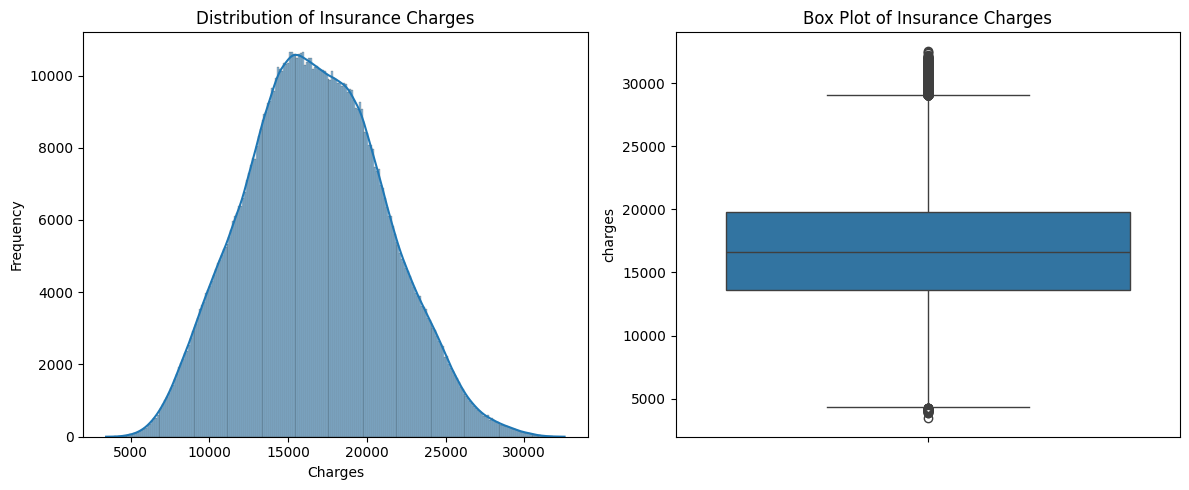

In [39]:
plt.figure(figsize=(12, 5))

# Histogram of Charges
plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Box Plot of Charges
plt.subplot(1, 2, 2)
sns.boxplot(y=df['charges'])
plt.title('Box Plot of Insurance Charges')

plt.tight_layout()
plt.show()

## Key Insights from Distribution
### Histogram Characteristics

- 1.Shape: Right-skewed distribution
    * Most charges concentrated between $5,000-$20,000
    * Long tail extending to higher charges

- 2.Frequency Pattern
    - Peak frequency around $10,000-$15,000
    - Rapidly declining frequencies for higher charges
    - Few insurance plans exceed $25,000


### Box Plot Interpretation

- 1.Central Tendency
    - Median charge: Approximately $15,000
    - 50% of insurance charges fall between $10,000-$20,000


- 2.Variability
    - Significant variation in insurance costs
    - Interquartile range shows most charges cluster around the median


- 3.Outliers
    - Several high-cost outliers
    - Some charges reaching near $30,000
    - Indicates exceptional cases with substantially higher costs

In [40]:
# Descriptive Statistics of Charges
print(df['charges'].describe())

count    1000000.000000
mean       16735.117481
std         4415.808211
min         3445.011643
25%        13600.372379
50%        16622.127973
75%        19781.465410
max        32561.560374
Name: charges, dtype: float64


### Check correlations:
#### Identify which features have a strong relationship with the target variable.

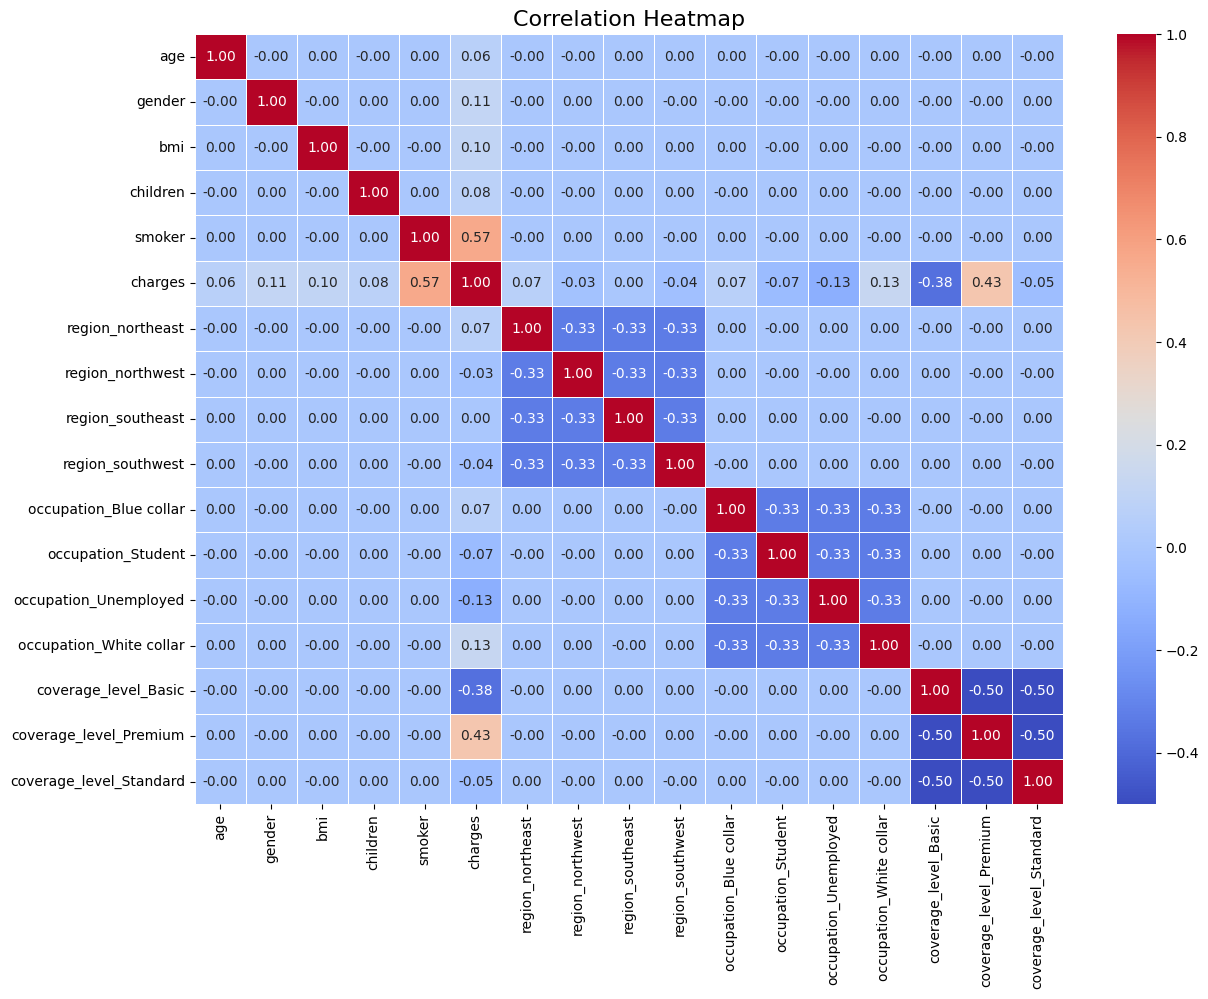

In [41]:
# Set figure size
plt.figure(figsize=(14, 10))

# Create the heatmap with improved formatting
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

# Show the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Key Observations from the Heatmap
- Strong Correlations
    - `charges` and `smoker`: 0.57
    - Smoking is positively correlated with higher insurance charges.
    - `coverage_level_Premium` and `charges`: 0.43
    - Premium coverage correlates with higher charges, which makes intuitive sense.

- Weak to No Correlations
    - Variables like `age`, `gender`, `children`, and `region` have correlations close to 0 with `charges`.
    - The regions (`region_northeast`, etc.) show no meaningful correlation with charges, likely indicating location doesn't heavily influence costs.

- Negative Correlations
    - `coverage_level_Basic` with `charges`: -0.38
    - Basic coverage is negatively correlated with charges since lower coverage typically means lower costs.

C:\Users\dteo8\AppData\Local\Temp\ipykernel_19056\3178433195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


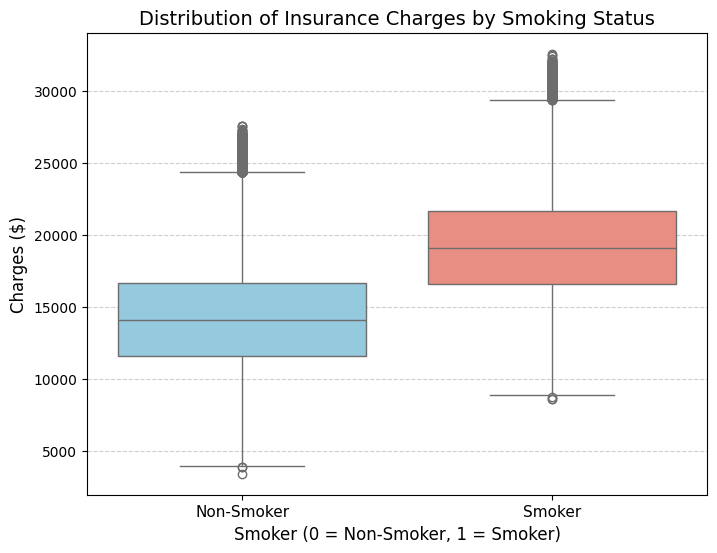

In [42]:
plt.figure(figsize=(8, 6))  # Bigger figure size
sns.boxplot(
    x='smoker', y='charges', data=df,
    palette=['skyblue', 'salmon']
)
plt.title('Distribution of Insurance Charges by Smoking Status', fontsize=14)
plt.xlabel('Smoker (0 = Non-Smoker, 1 = Smoker)', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'], fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Grid for easier comparison
plt.show()

## Key Insights from the Boxplot

- Higher Median Charges for Smokers:
    - Smokers tend to have higher median insurance charges compared to non-smokers. This aligns with health risks associated with smoking, justifying higher insurance costs.

- Wider Range of Charges for Smokers:
    - The interquartile range (IQR) and outliers are more spread out for smokers, indicating more variability in their insurance costs.

- Outliers:
    - Both smokers and non-smokers show outliers, but they are particularly pronounced for smokers, with charges going beyond $30,000.

## 3. Machine Learning Model Training and Evaluation

### Step 1: Splitting Data
#### We'll split the data for training and testing.

In [43]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns='charges')
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Feature Scaling
#### Scaling ensures all features contribute equally to the model.

In [44]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Building and Training

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

### Step 4: Model Evaluation

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 290.43652509087497
Mean Squared Error (MSE): 123715.27869609323
Root Mean Squared Error (RMSE): 351.7318278121746
R² Score: 0.9936428217399128


### Step 5: Model Optimization

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid_lite = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid_search_lite = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_lite,
    cv=3, n_jobs=-1, verbose=2
)

grid_search_lite.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search_lite.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


KeyboardInterrupt: 

### Step 6: Final Model and Feature Importance

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()